# Plotting

In [1]:
import starepandas
import pandas
import geopandas

In [2]:
starepandas.__version__

'0.6.0+2.g3287417.dirty'

In [3]:
cities = ['Buenos Aires', 'Brasilia', 'Santiago', 'Bogota', 'Caracas']
countries = ['Argentina', 'Brazil', 'Chile', 'Colombia', 'Venezuela']
latitudes = [-34.58, -15.78, -33.45, 4.60, 10.48]
longitudes = [-58.66, -47.91, -70.66, -74.08, -66.86]
data = {'City': cities,  'Country': countries,
        'Latitude': latitudes, 'Longitude': longitudes}

In [4]:
df = pandas.DataFrame(data)
geom = geopandas.points_from_xy(df.Longitude, df.Latitude)
gdf = geopandas.GeoDataFrame(df, geometry=geom)

stare = starepandas.sids_from_gdf(gdf, level=5)
sdf = starepandas.STAREDataFrame(gdf)
sdf.set_sids(stare, inplace=True)

trixels = sdf.make_trixels()
trixel_df = sdf.set_trixels(trixels, inplace=False)

<AxesSubplot:>

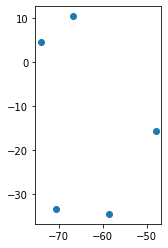

In [5]:
trixel_df.plot(trixels=False, boundary=False)

In [6]:
trixel_df[trixel_df._geometry_column_name]

0    POINT (-58.66000 -34.58000)
1    POINT (-47.91000 -15.78000)
2    POINT (-70.66000 -33.45000)
3      POINT (-74.08000 4.60000)
4     POINT (-66.86000 10.48000)
Name: geometry, dtype: geometry

In [7]:
trixel_df._geometry_column_name

'geometry'

In [8]:
import shapely
polygon = shapely.geometry.Polygon([(0, 0), (1, 1), (1, 0)])

In [9]:
starepandas.sids_from_ring(polygon.exterior, force_ccw=True, level=6)

array([4430697608402436102, 4430838345890791430, 4430979083379146758])

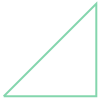

In [10]:
polygon.exterior

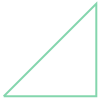

In [11]:
shapely.geometry.LinearRing(polygon.exterior.coords[::-1])